In [2]:
import os, sys, glob, pickle, tables
import numpy as np
import matplotlib.pyplot as plt
import tables
import pandas as pd
sys.path.append('/home/amcclure/.local/lib/python3.10/site-packages')  # <-- teach jupyterhub where I installed it for myself
import simweights

In [ ]:
#Tommy's Pickling Code
p_list = glob.glob('/data/ana/CosmicRay/IceTop_level3/sim/IC86.2012/SIBYLL2.1/p/12360_v1s/h5files/*.h5')
he_list = glob.glob('/data/ana/CosmicRay/IceTop_level3/sim/IC86.2012/SIBYLL2.1/He/12630_v1s/h5files/*.h5')
o_list = glob.glob('/data/ana/CosmicRay/IceTop_level3/sim/IC86.2012/SIBYLL2.1/O/12631_v1s/h5files/*.h5')
fe_list = glob.glob('/data/ana/CosmicRay/IceTop_level3/sim/IC86.2012/SIBYLL2.1/Fe/12362_v1s/h5files/*.h5')

bigfilelist = p_list + he_list + o_list + fe_list

weighter = None
print('Getting weights...')
    
for filename in bigfilelist:
    file_obj = tables.open_file(filename, 'r')
    
    if weighter is None:
        weighter = simweights.IceTopWeighter(file_obj)
    else:
        weighter += simweights.IceTopWeighter(file_obj)
        
PICKLING_FILES = {
    'energy': weighter.get_column('MCPrimary', 'energy'),
    'type': weighter.get_column('MCPrimary', 'type'),
    'hits': weighter.get_column('IceTopHLCSeedRTPulses_SnowUnAttenuated_info', 'nstrings'),
    'weights': weighter.get_weights(simweights.GaisserH4a_IT())
    'exists': weighter.get_column('IT73AnalysisIceTopQualityCuts', 'exists'),
    'beta': weighter.get_column('IT73AnalysisIceTopQualityCuts', 'BetaCutPassed'),
    'maxabove6': weighter.get_column('IT73AnalysisIceTopQualityCuts', 'IceTopMaxSignalAbove6'),
    'max_inside': weighter.get_column('IT73AnalysisIceTopQualityCuts', 'IceTopMaxSignalInside'), 
    'neighbormax4': weighter.get_column('IT73AnalysisIceTopQualityCuts', 'IceTopNeighbourMaxSignalAbove4'),
    'standard': weighter.get_column('IT73AnalysisIceTopQualityCuts', 'IceTop_StandardFilter'),
    'reco': weighter.get_column('IT73AnalysisIceTopQualityCuts', 'IceTop_reco_succeeded'),
    'fraction': weighter.get_column('IT73AnalysisIceTopQualityCuts', 'Laputop_FractionContainment'),
    'density': weighter.get_column('IT73AnalysisIceTopQualityCuts', 'StationDensity_passed')
}

for key, array in PICKLING_FILES.items():
    with open(f'{key}.pkl', 'wb') as f:
        pickle.dump(array, f)

Getting weights...


In [3]:
def weighting(path):
    weighter = None
    filelist = glob.glob(path)

    for filename in filelist:
        file_obj = tables.open_file(filename, 'r')
    
        if weighter is None:
            weighter = simweights.IceTopWeighter(file_obj)
        else:
            weighter += simweights.IceTopWeighter(file_obj)
    return weighter

In [6]:
# Load in the SIBYLL2.1 particle sims (Tommy's Pickling code cont.)
weighter = None

primary_energy = []
hits = []
particle_type = []
weights_type = []

if os.path.isfile('energy.pkl'):
    with open('energy.pkl', 'rb') as file:
        primary_energy = pickle.load(file)
else:
    for path in bigfilelist:
        weighter = weighting(path)

if os.path.isfile('hits.pkl'): 
    with open('hits.pkl', 'rb') as file:
        hits = pickle.load(file)
elif not weighter==None:
    for path in bigfilelist:
        weighter = weighting(path)
    
if os.path.isfile('type.pkl'):
    with open('type.pkl', 'rb') as file:
        particle_type = pickle.load(file)
elif not weighter==None:
    for path in bigfilelist:
        weighter = weighting(path)

if os.path.isfile('weights.pkl'):
    with open('weights.pkl', 'rb') as file:
        weights_type = pickle.load(file)
elif not weighter==None:
    for path in bigfilelist:
        weighter = weighting(path)

In [5]:
#Load in the SIBYLL2.1 particle sims for quality cuts (Tommy's Pickling Code Cont.)
weighter = None

exists = []
beta = []
maxabove6 = []
max_inside = []
neighbormax4 = []
standard = []
reco = []
fraction = []
density = []

if os.path.isfile('exists.pkl'):
    with open('exists.pkl', 'rb') as file:
        exists = pickle.load(file)
elif not weighter==None:
    for path in bigfilelist:
        weighter = weighting(path)

if os.path.isfile('beta.pkl'):
    with open('beta.pkl', 'rb') as file:
        beta = pickle.load(file)
elif not weighter==None:
    for path in bigfilelist:
        weighter = weighting(path)

if os.path.isfile('maxabove6.pkl'):
    with open('maxabove6.pkl', 'rb') as file:
        maxabove6 = pickle.load(file)
elif not weighter==None:
    for path in bigfilelist:
        weighter = weighting(path)

if os.path.isfile('max_inside.pkl'):
    with open('max_inside.pkl', 'rb') as file:
        max_inside = pickle.load(file)
elif not weighter==None:
    for path in bigfilelist:
        weighter = weighting(path)

if os.path.isfile('neighbormax4.pkl'):
    with open('neighbormax4.pkl', 'rb') as file:
        neighbormax4 = pickle.load(file)
elif not weighter==None:
    for path in bigfilelist:
        weighter = weighting(path)

if os.path.isfile('standard.pkl'):
    with open('standard.pkl', 'rb') as file:
        standard = pickle.load(file)
elif not weighter==None:
    for path in bigfilelist:
        weighter = weighting(path)

if os.path.isfile('reco.pkl'):
    with open('reco.pkl', 'rb') as file:
        reco = pickle.load(file)
elif not weighter==None:
    for path in bigfilelist:
        weighter = weighting(path)

if os.path.isfile('fraction.pkl'):
    with open('fraction.pkl', 'rb') as file:
        fraction = pickle.load(file)
elif not weighter==None:
    for path in bigfilelist:
        weighter = weighting(path)

if os.path.isfile('density.pkl'):
    with open('density.pkl', 'rb') as file:
        density = pickle.load(file)
elif not weighter==None:
    for patb in bigfilelist:
        weighter = weighting(path)
        

In [45]:
#Define data frame with each quality cut as a column
df = pd.DataFrame({'nStations': hits, 'Primary Energy': primary_energy, 'weights': weights_type, 'type': particle_type, 
                   'exists': exists, 'beta': beta, 'maxabove6': maxabove6, 'max inside': max_inside, 
                   'neighbormax4': neighbormax4, 'standard cut': standard, 'reco': reco, 'fraction':
                  fraction, 'density': density})
#print(df)

In [8]:
#type cuts
protoncut = (particle_type==2212.0)
heliumcut = (particle_type==1000020040.0)
oxygencut = (particle_type==1000080160.0)
ironcut = (particle_type==1000260560.0)

In [18]:
#tier1 cuts
#want: Primary Energy, weights, type exists==1, beta==1, max_inside==1, standardcut ==1, reco succeeded==1
#fraction contained==1, station density passed==1
#cut dataframe based on quality and station cuts for tier 1 (take only rows where all conditions are true)
tier1c = df[(df['nStations'] >= 3) & (df['nStations'] < 5) & (df['exists'] ==1) & (df['beta'] ==1) & (df['max inside'] ==1 ) & 
(df['standard cut'] ==1) & (df['fraction']==1) & (df['density']==1)]
#& (df['reco']==1)
#turn primary energy values in each 'true' row into a numpy array
tier1energy = tier1c['Primary Energy'].to_numpy()
#turn weighter values in each 'true' row into a numpy array of the same length as above
weightstier1 = tier1c['weights'].to_numpy()

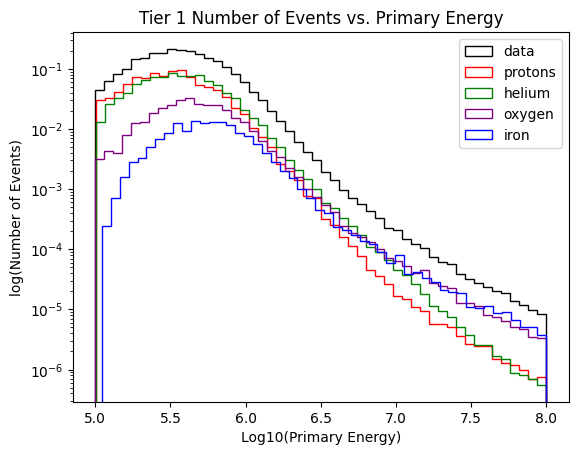

In [15]:
#plot histogram tier 1: all data
#plot histogram with weights and tier cuts from above dataframe cuts
plt.hist(np.log10(tier1energy), bins=50, log=True, weights=weightstier1, histtype='step', color='black', label='data')
plt.xlabel("Log10(Primary Energy)")
plt.ylabel("log(Number of Events)")
plt.title("Tier 1 Number of Events vs. Primary Energy")

#apply type cuts:
#tier1: protons
t1protons = df[(df['nStations'] >= 3) & (df['nStations'] < 5) & (df['type'] ==2212.0) & (df['exists'] ==1) & (df['beta'] ==1)
& (df['max inside'] ==1) & (df['standard cut'] ==1) & (df['fraction']==1) & (df['density']==1)]
#(df['reco']==1) & 
t1penergy = t1protons['Primary Energy'].to_numpy()
weightst1p = t1protons['weights'].to_numpy()
plt.hist(np.log10(t1penergy), bins=50, log=True, weights=weightst1p, histtype='step', color='red', label='protons')

#tier1: helium
t1helium = df[(df['nStations'] >= 3) & (df['nStations'] < 5) & (df['type'] ==1000020040.0) & (df['exists'] ==1) & (df['beta'] ==1) & (df['max inside']==1) & 
(df['standard cut'] ==1) & (df['fraction']==1) & (df['density']==1)] #(df['reco']==1) & 
t1henergy = t1helium['Primary Energy'].to_numpy()
weightst1h = t1helium['weights'].to_numpy()
plt.hist(np.log10(t1henergy), bins=50, log=True, weights=weightst1h, histtype='step', color='green', label='helium')

#tier1: oxygen
t1oxygen = df[(df['nStations'] >= 3) & (df['nStations'] < 5) & (df['type'] ==1000080160.0) & (df['exists'] ==1) & (df['beta'] ==1) & (df['max inside']==1) & 
(df['standard cut'] ==1) & (df['fraction']==1) & (df['density']==1)]
#& (df['reco']==1) 
t1oenergy = t1oxygen['Primary Energy'].to_numpy()
weightst1o = t1oxygen['weights'].to_numpy()
plt.hist(np.log10(t1oenergy), bins=50, log=True, weights=weightst1o, histtype='step', color='purple', label='oxygen')

#tier1: iron
t1iron = df[(df['nStations'] >= 3) & (df['nStations'] < 5) & (df['type'] ==1000260560.0) & (df['exists'] ==1) & (df['beta'] ==1) & (df['max inside']==1) & 
(df['standard cut'] ==1) & (df['fraction']==1) & (df['density']==1)]
#& (df['reco']==1) 
t1Feenergy = t1iron['Primary Energy'].to_numpy()
weightst1Fe = t1iron['weights'].to_numpy()
plt.hist(np.log10(t1Feenergy), bins=50, log=True, weights=weightst1Fe, histtype='step', color='blue', label='iron')

plt.legend()
plt.show()

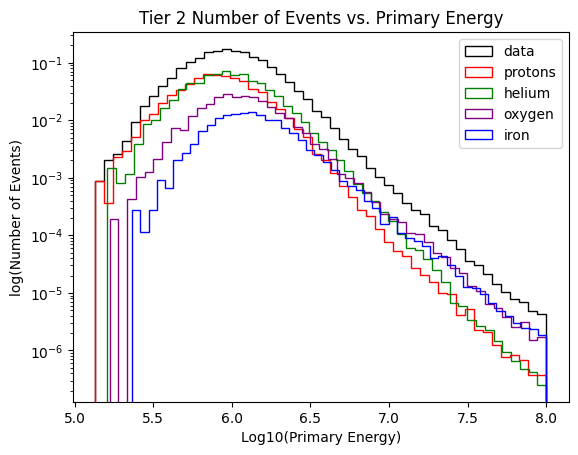

In [24]:
#tier2 cuts
#want: Primary Energy, weights, type exists==1, beta==1, max_inside==1, standardcut ==1, reco succeeded==1
#fraction contained==1, station density passed==1
tier2c = df[(df['nStations'] >= 5) & (df['nStations'] < 9) & (df['exists'] ==1) & (df['beta'] ==1) & (df['max inside'] ==1 ) & 
(df['standard cut'] ==1) & (df['fraction']==1) & (df['density']==1)]
tier2energy = tier2c['Primary Energy'].to_numpy()
weightstier2 = tier2c['weights'].to_numpy()

#plot histogram tier 2: all data
plt.hist(np.log10(tier2energy), bins=50, log=True, weights=weightstier2, histtype='step', color='black', label='data')
plt.xlabel("Log10(Primary Energy)")
plt.ylabel("log(Number of Events)")
plt.title("Tier 2 Number of Events vs. Primary Energy")

#tier2: protons
t2protons = df[(df['nStations'] >= 5) & (df['nStations'] < 9) & (df['type'] ==2212.0) & (df['exists'] ==1) & (df['beta'] ==1)
& (df['max inside'] ==1) & (df['standard cut'] ==1) & (df['fraction']==1) & (df['density']==1)]
#(df['reco']==1) & 
t2penergy = t2protons['Primary Energy'].to_numpy()
weightst2p = t2protons['weights'].to_numpy()
plt.hist(np.log10(t2penergy), bins=50, log=True, weights=weightst2p, histtype='step', color='red', label='protons')

#tier2: helium
t2helium = df[(df['nStations'] >= 5) & (df['nStations'] < 9) & (df['type'] ==1000020040.0) & (df['exists'] ==1) & (df['beta'] ==1) & (df['max inside']==1) & 
(df['standard cut'] ==1) & (df['fraction']==1) & (df['density']==1)] #(df['reco']==1) & 
t2henergy = t2helium['Primary Energy'].to_numpy()
weightst2h = t2helium['weights'].to_numpy()
plt.hist(np.log10(t2henergy), bins=50, log=True, weights=weightst2h, histtype='step', color='green', label='helium')

#tier2: oxygen
t2oxygen = df[(df['nStations'] >= 5) & (df['nStations'] < 9) & (df['type'] ==1000080160.0) & (df['exists'] ==1) & (df['beta'] ==1) & (df['max inside']==1) & 
(df['standard cut'] ==1) & (df['fraction']==1) & (df['density']==1)]
#& (df['reco']==1) 
t2oenergy = t2oxygen['Primary Energy'].to_numpy()
weightst2o = t2oxygen['weights'].to_numpy()
plt.hist(np.log10(t2oenergy), bins=50, log=True, weights=weightst2o, histtype='step', color='purple', label='oxygen')

#tier2: iron
t2iron = df[(df['nStations'] >= 5) & (df['nStations'] < 9) & (df['type'] ==1000260560.0) & (df['exists'] ==1) & (df['beta'] ==1) & (df['max inside']==1) & 
(df['standard cut'] ==1) & (df['fraction']==1) & (df['density']==1)]
t2Feenergy = t2iron['Primary Energy'].to_numpy()
weightst2Fe = t2iron['weights'].to_numpy()
plt.hist(np.log10(t2Feenergy), bins=50, log=True, weights=weightst2Fe, histtype='step', color='blue', label='iron')

plt.legend()
plt.show()

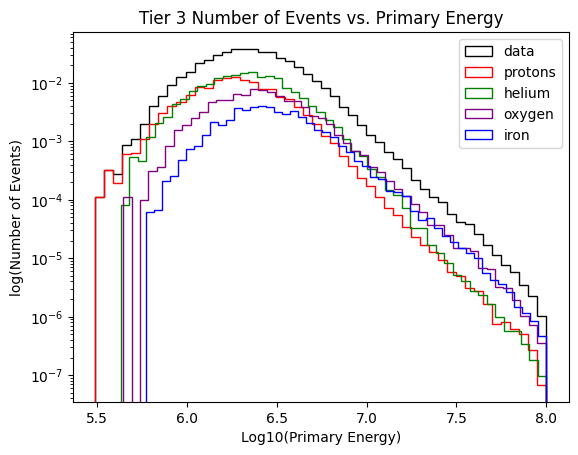

In [26]:
#tier3 cuts
#want: Primary Energy, weights, type exists==1, beta==1, max_inside==1, standardcut ==1, reco succeeded==1
#fraction contained==1, station density passed==1, maxabove6 ==1, neighbormax4 ==1
tier3c = df[(df['nStations'] >= 9) & (df['nStations'] < 16) & (df['exists'] ==1) & (df['beta'] ==1) & (df['max inside'] ==1 ) & 
(df['standard cut'] ==1) & (df['fraction']==1) & (df['density']==1) & (df['maxabove6']==1) & (df['neighbormax4']==1)]
tier3energy = tier3c['Primary Energy'].to_numpy()
weightstier3 = tier3c['weights'].to_numpy()

#plot histogram tier 3: all data
plt.hist(np.log10(tier3energy), bins=50, log=True, weights=weightstier3, histtype='step', color='black', label='data')
plt.xlabel("Log10(Primary Energy)")
plt.ylabel("log(Number of Events)")
plt.title("Tier 3 Number of Events vs. Primary Energy")

#tier3: protons
t3protons = df[(df['nStations'] >= 9) & (df['nStations'] < 16) & (df['type'] ==2212.0) & (df['exists'] ==1) & (df['beta'] ==1)
& (df['max inside'] ==1) & (df['standard cut'] ==1) & (df['fraction']==1) & (df['density']==1) & (df['maxabove6']==1) & (df['neighbormax4']==1)]
#(df['reco']==1) & 
t3penergy = t3protons['Primary Energy'].to_numpy()
weightst3p = t3protons['weights'].to_numpy()
plt.hist(np.log10(t3penergy), bins=50, log=True, weights=weightst3p, histtype='step', color='red', label='protons')

#tier3: helium
t3helium = df[(df['nStations'] >= 9) & (df['nStations'] < 16) & (df['type'] ==1000020040.0) & (df['exists'] ==1) & (df['beta'] ==1) & (df['max inside']==1) & 
(df['standard cut'] ==1) & (df['fraction']==1) & (df['density']==1) & (df['maxabove6']==1) & (df['neighbormax4']==1)] #(df['reco']==1) & 
t3henergy = t3helium['Primary Energy'].to_numpy()
weightst3h = t3helium['weights'].to_numpy()
plt.hist(np.log10(t3henergy), bins=50, log=True, weights=weightst3h, histtype='step', color='green', label='helium')

#tier3: oxygen
t3oxygen = df[(df['nStations'] >= 9) & (df['nStations'] < 16) & (df['type'] ==1000080160.0) & (df['exists'] ==1) & (df['beta'] ==1) & (df['max inside']==1) & 
(df['standard cut'] ==1) & (df['fraction']==1) & (df['density']==1) & (df['maxabove6']==1) & (df['neighbormax4']==1)]
#& (df['reco']==1) 
t3oenergy = t3oxygen['Primary Energy'].to_numpy()
weightst3o = t3oxygen['weights'].to_numpy()
plt.hist(np.log10(t3oenergy), bins=50, log=True, weights=weightst3o, histtype='step', color='purple', label='oxygen')

#tier3: iron
t3iron = df[(df['nStations'] >= 9) & (df['nStations'] < 16) & (df['type'] ==1000260560.0) & (df['exists'] ==1) & (df['beta'] ==1) & (df['max inside']==1) & 
(df['standard cut'] ==1) & (df['fraction']==1) & (df['density']==1) & (df['maxabove6']==1) & (df['neighbormax4']==1)]
t3Feenergy = t3iron['Primary Energy'].to_numpy()
weightst3Fe = t3iron['weights'].to_numpy()
plt.hist(np.log10(t3Feenergy), bins=50, log=True, weights=weightst3Fe, histtype='step', color='blue', label='iron')

plt.legend()
plt.show()

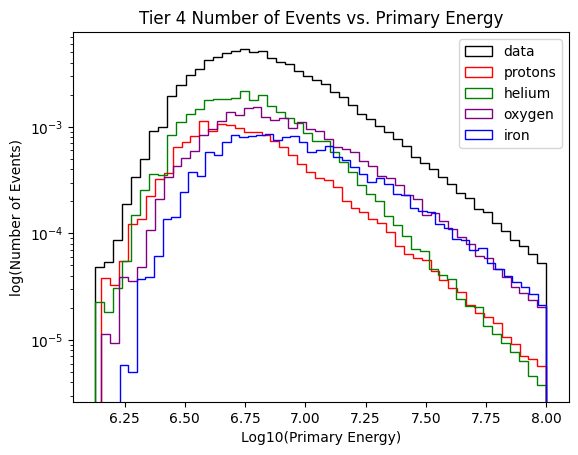

In [28]:
#tier4 cuts
#want: Primary Energy, weights, type exists==1, beta==1, max_inside==1, standardcut ==1, reco succeeded==1
#fraction contained==1, station density passed==1, maxabove6 ==1, neighbormax4 ==1
tier4c = df[(df['nStations'] >= 16) & (df['exists'] ==1) & (df['beta'] ==1) & (df['max inside'] ==1 ) & 
(df['standard cut'] ==1) & (df['fraction']==1) & (df['density']==1) & (df['maxabove6']==1) & (df['neighbormax4']==1)]
tier4energy = tier4c['Primary Energy'].to_numpy()
weightstier4 = tier4c['weights'].to_numpy()

#plot histogram tier 3: all data
plt.hist(np.log10(tier4energy), bins=50, log=True, weights=weightstier4, histtype='step', color='black', label='data')
plt.xlabel("Log10(Primary Energy)")
plt.ylabel("log(Number of Events)")
plt.title("Tier 4 Number of Events vs. Primary Energy")

#tier4: protons
t4protons = df[(df['nStations'] >= 16) & (df['type'] ==2212.0) & (df['exists'] ==1) & (df['beta'] ==1)
& (df['max inside'] ==1) & (df['standard cut'] ==1) & (df['fraction']==1) & (df['density']==1) & (df['maxabove6']==1) & (df['neighbormax4']==1)]
#(df['reco']==1) & 
t4penergy = t4protons['Primary Energy'].to_numpy()
weightst4p = t4protons['weights'].to_numpy()
plt.hist(np.log10(t4penergy), bins=50, log=True, weights=weightst4p, histtype='step', color='red', label='protons')

#tier4: helium
t4helium = df[(df['nStations'] >= 16) & (df['type'] ==1000020040.0) & (df['exists'] ==1) & (df['beta'] ==1) & (df['max inside']==1) & 
(df['standard cut'] ==1) & (df['fraction']==1) & (df['density']==1) & (df['maxabove6']==1) & (df['neighbormax4']==1)] #(df['reco']==1) & 
t4henergy = t4helium['Primary Energy'].to_numpy()
weightst4h = t4helium['weights'].to_numpy()
plt.hist(np.log10(t4henergy), bins=50, log=True, weights=weightst4h, histtype='step', color='green', label='helium')

#tier4: oxygen
t4oxygen = df[(df['nStations'] >= 16) & (df['type'] ==1000080160.0) & (df['exists'] ==1) & (df['beta'] ==1) & (df['max inside']==1) & 
(df['standard cut'] ==1) & (df['fraction']==1) & (df['density']==1) & (df['maxabove6']==1) & (df['neighbormax4']==1)]
#& (df['reco']==1) 
t4oenergy = t4oxygen['Primary Energy'].to_numpy()
weightst4o = t4oxygen['weights'].to_numpy()
plt.hist(np.log10(t4oenergy), bins=50, log=True, weights=weightst4o, histtype='step', color='purple', label='oxygen')

#tier4: iron
t4iron = df[(df['nStations'] >= 16) & (df['type'] ==1000260560.0) & (df['exists'] ==1) & (df['beta'] ==1) & (df['max inside']==1) & 
(df['standard cut'] ==1) & (df['fraction']==1) & (df['density']==1) & (df['maxabove6']==1) & (df['neighbormax4']==1)]
t4Feenergy = t4iron['Primary Energy'].to_numpy()
weightst4Fe = t4iron['weights'].to_numpy()
plt.hist(np.log10(t4Feenergy), bins=50, log=True, weights=weightst4Fe, histtype='step', color='blue', label='iron')

plt.legend()
plt.show()

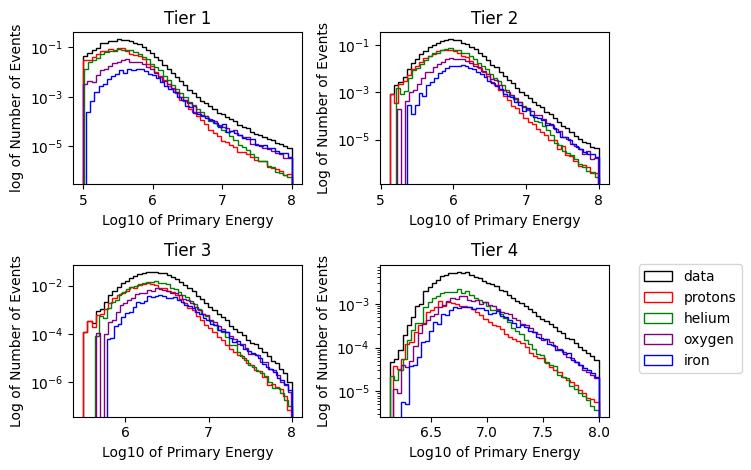

In [31]:
#all together
#tier 1
plt.subplot(2, 2, 1)
plt.tight_layout()
plt.hist(np.log10(tier1energy), bins=50, log=True, weights=weightstier1, histtype='step', color='black', label='data')
plt.hist(np.log10(t1penergy), bins=50, log=True, weights=weightst1p, histtype='step', color='red', label='protons')
plt.hist(np.log10(t1henergy), bins=50, log=True, weights=weightst1h, histtype='step', color='green', label='helium')
plt.hist(np.log10(t1oenergy), bins=50, log=True, weights=weightst1o, histtype='step', color='purple', label='oxygen')
plt.hist(np.log10(t1Feenergy), bins=50, log=True, weights=weightst1Fe, histtype='step', color='blue', label='iron')
plt.xlabel("Log10 of Primary Energy")
plt.ylabel("log of Number of Events")
plt.title("Tier 1")

#tier 2
plt.subplot(2, 2, 2)
plt.tight_layout()
plt.hist(np.log10(tier2energy), bins=50, log=True, weights=weightstier2, histtype='step', color='black', label='data')
plt.hist(np.log10(t2penergy), bins=50, log=True, weights=weightst2p, histtype='step', color='red', label='protons')
plt.hist(np.log10(t2henergy), bins=50, log=True, weights=weightst2h, histtype='step', color='green', label='helium')
plt.hist(np.log10(t2oenergy), bins=50, log=True, weights=weightst2o, histtype='step', color='purple', label='oxygen')
plt.hist(np.log10(t2Feenergy), bins=50, log=True, weights=weightst2Fe, histtype='step', color='blue', label='iron')
plt.xlabel('Log10 of Primary Energy')
plt.ylabel('Log of Number of Events')
plt.title('Tier 2')

#tier 3
plt.subplot(2, 2, 3)
plt.tight_layout()
plt.hist(np.log10(tier3energy), bins=50, log=True, weights=weightstier3, histtype='step', color='black', label='data')
plt.hist(np.log10(t3penergy), bins=50, log=True, weights=weightst3p, histtype='step', color='red', label='protons')
plt.hist(np.log10(t3henergy), bins=50, log=True, weights=weightst3h, histtype='step', color='green', label='helium')
plt.hist(np.log10(t3oenergy), bins=50, log=True, weights=weightst3o, histtype='step', color='purple', label='oxygen')
plt.hist(np.log10(t3Feenergy), bins=50, log=True, weights=weightst3Fe, histtype='step', color='blue', label='iron')
plt.xlabel('Log10 of Primary Energy')
plt.ylabel('Log of Number of Events')
plt.title('Tier 3')

#tier 4
ax = plt.subplot(2, 2, 4)
plt.tight_layout()
plt.hist(np.log10(tier4energy), bins=50, log=True, weights=weightstier4, histtype='step', color='black', label='data')
plt.hist(np.log10(t4penergy), bins=50, log=True, weights=weightst4p, histtype='step', color='red', label='protons')
plt.hist(np.log10(t4henergy), bins=50, log=True, weights=weightst4h, histtype='step', color='green', label='helium')
plt.hist(np.log10(t4oenergy), bins=50, log=True, weights=weightst4o, histtype='step', color='purple', label='oxygen')
plt.hist(np.log10(t4Feenergy), bins=50, log=True, weights=weightst4Fe, histtype='step', color='blue', label='iron')
plt.xlabel('Log10 of Primary Energy')
plt.ylabel('Log of Number of Events')
plt.title('Tier 4')

ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()